In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [8]:
Cb = np.linalg.inv(np.array([[1,-1],[-1,2]]))
C = np.array([[1,-1],[-1,2]])

@np.vectorize
def example(x1, x2):
    x = np.array([x1, x2])
    mu = np.array([1,1])
    tmp = np.matmul(C,(x-mu))
    tmp = np.matmul(np.transpose(x-mu),tmp)
    return np.log2(tmp+1)

@np.vectorize
def example2(x1,x2):
    return x1**2+2*x2**2-2*x1*x2-2*x2+1

In [9]:
delta = 0.025
x1 = np.arange(-15.0, 15.0, delta)
x2 = np.arange(-15.0, 15.0, delta)
X1, X2 = np.meshgrid(x1, x2)

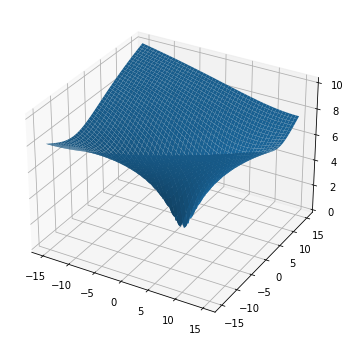

In [10]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
Z = example(X1, X2)
ax.plot_surface(X1, X2, Z)


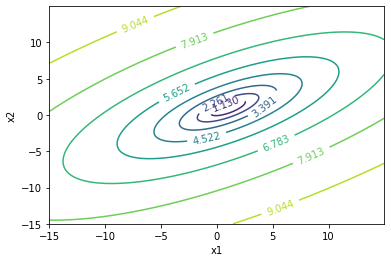

In [11]:
cp = plt.contour(X1,X2,Z,np.linspace(Z.min(),Z.max(),10))
plt.clabel(cp, inline=True, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('contour.pdf')

In [113]:
def deriv(x1,x2):
    E = x1**2+2*x2**2-2*x1*x2-2*x2+1
    dx1 = (2*x1-2*x2)*1/(E+1)
    dx2 = (4*x2-2*x1-2)*1/(E+1)
    return (dx1,dx2)

New point: (-5.0,-4.837837837837838)
New point: (-4.995380870144192,-4.676168292884549)
New point: (-4.98580088591213,-4.515399090968667)
New point: (-4.9709339977741065,-4.355953673746884)
New point: (-4.950478592228899,-4.198259957771604)
New point: (-4.924165961408911,-4.042737296417726)
New point: (-4.891767780529678,-3.889782400474312)
New point: (-4.853101907109359,-3.739755194022351)
New point: (-4.8080359360175855,-3.5929656828595125)
New point: (-4.756488159093493,-3.449662857668459)


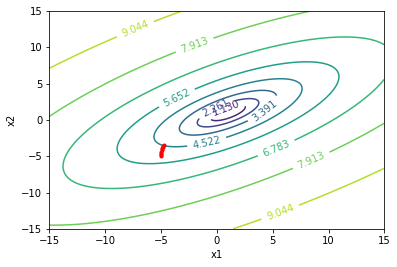

In [148]:
cp = plt.contour(X1,X2,Z,np.linspace(Z.min(),Z.max(),10))
sx1 = -5
sx2 = -5
lr = 0.5
plt.plot(sx1,sx2,'r.')
plt.clabel(cp, inline=True, fontsize=10)
for iter in range(0,10):
    dx1, dx2 = deriv(sx1, sx2)
    sx1 = sx1 - lr*dx1
    sx2 = sx2 - lr*dx2
    print("New point: ({},{})".format(sx1,sx2))
    plt.plot(sx1,sx2,'r.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('contour-GD.pdf')
    

New point: (-5.0,-4.837837837837838)
New point: (-4.995380870144192,-4.530222346938603)
New point: (-4.976595903322989,-4.094088324461926)
New point: (-4.927862763404264,-3.549681654921558)
New point: (-4.825602924473698,-2.9253242635596073)
New point: (-4.638646402461742,-2.2622475895458765)
New point: (-4.332938261204589,-1.614242445042791)
New point: (-3.8792397553143747,-1.037898206270812)
New point: (-3.2560851776051276,-0.5799345052220999)
New point: (-2.4441523408626513,-0.27062124549097477)


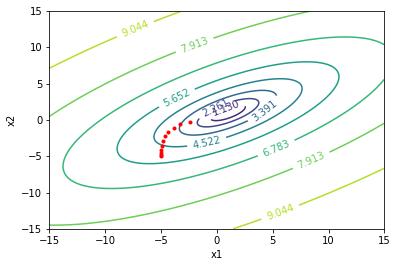

In [149]:
cp = plt.contour(X1,X2,Z,np.linspace(Z.min(),Z.max(),10))
sx1 = -5
sx2 = -5
lr = 0.5
alpha = 0.9
v = [0.0,0.0]
plt.plot(sx1,sx2,'r.')
plt.clabel(cp, inline=True, fontsize=10)
for iter in range(0,10):
    d = deriv(sx1, sx2)    
    v[0] = alpha * v[0] - lr*d[0] 
    v[1] = alpha * v[1] - lr*d[1] 
    sx1 = sx1 + v[0]
    sx2 = sx2 + v[1]
    print("New point: ({},{})".format(sx1,sx2))
    plt.plot(sx1,sx2,'r.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('contour-GD-momentum.pdf')